# PIGSKIN BETTING

I have always been into football, watching the NFL every Sunday with my Dad. Recently, I have immursed in new areas of the sport, betting. I played my first season of Fantasy Football this year (and almost won). My boyfirend is big into all of the other types of betting as well. He has a really effecive strategy, his gut. I keep telling him there are better ways, but you know, stubborn men. My goal is to find trends in this NFL data that will help me win more bets than him. 

### WHAT DO WE NEED?

In [22]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
from matplotlib.pyplot import scatter, xlabel, title, plot

### HELPER DATA 

In [2]:
teams = pd.read_csv('nfl_teams.csv')
display(teams)

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Phoenix Cardinals,Cardinals,ARI,CRD,NFC,NaN,NFC,NFC East
2,St. Louis Cardinals,Cardinals,ARI,ARI,NFC,NaN,NFC,NFC East
3,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
4,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central
5,Buffalo Bills,Bills,BUF,BUF,AFC,AFC East,AFC,AFC East
6,Carolina Panthers,Panthers,CAR,CAR,NFC,NFC South,NFC,NFC West
7,Chicago Bears,Bears,CHI,CHI,NFC,NFC North,NFC,NFC Central
8,Cincinnati Bengals,Bengals,CIN,CIN,AFC,AFC North,AFC,AFC Central
9,Cleveland Browns,Browns,CLE,CLE,AFC,AFC North,AFC,AFC Central


In [3]:
stadiums = pd.read_csv('nfl_stadiums.csv', encoding= 'unicode_escape')
display(stadiums)

,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type,stadium_address,stadium_weather_station_code,stadium_weather_type,stadium_capacity,stadium_surface,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION
0,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",78203,dome,72000,FieldTurf,NaN,NaN,NaN,NaN,NaN
1,Allegiant Stadium,"Paradise, NV",2020.0,NaN,indoor,NaN,NaN,dome,65000,Grass,NaN,NaN,NaN,NaN,NaN
2,Alltel Stadium,"Jacksonville, FL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alumni Stadium,"Chestnut Hill, MA",NaN,NaN,outdoor,"Perimeter Rd, Chestnut Hill, MA 02467",2467,cold,NaN,Grass,NaN,NaN,NaN,NaN,NaN
4,Anaheim Stadium,"Anaheim, CA",1980.0,1994.0,outdoor,"2000 E Gene Autry Way, Anaheim, CA 92806",92806,warm,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,War Memorial Stadium,"Buffalo, NY",1960.0,1972.0,outdoor,"285 Dodge Street, Buffalo, NY 14208",14208,cold,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,Wembley Stadium,"London, UK",2007.0,NaN,outdoor,"Wembley, London HA9 0WS, United Kingdom","Heathrow, UK",moderate,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,Wrigley Field,"Chicago, IL",1920.0,1970.0,outdoor,"1060 West Addison Street, Chicago, IL 60613",60613,cold,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,Yale Bowl,"New Haven, CT",NaN,NaN,outdoor,"276 Derby Ave, West Haven, CT 06516",6516,cold,NaN,Grass,NaN,NaN,NaN,NaN,NaN


## NFL DATA
### THE IMPORTANT STUFF, SCORES 

National Football League (NFL) game results since 1966 with betting odds information since 1979. Dataset was created from a variety of sources including games and scores from a variety of public websites such as ESPN, NFL.com, and Pro Football Reference. Weather information is from NOAA data with NFLweather.com a good cross reference. Betting data was used from http://www.repole.com/sun4cast/data.html for 1978-2013 seasons. Pro-football-reference.com data was then cross referenced for betting lines and odds as well as weather data. From 2013 on betting data reflects lines available at sportsline.com.

In [4]:
scores = pd.read_csv('spreadspoke_scores.csv')
display(scores)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13227,1/23/2022,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,54.0,Arrowhead Stadium,False,35.0,6.0,54.0,NaN
13228,1/23/2022,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,48.0,Raymond James Stadium,False,50.0,11.0,69.0,NaN
13229,1/30/2022,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,54.5,Arrowhead Stadium,False,41.0,4.0,41.0,NaN
13230,1/30/2022,2021,Conference,True,Los Angeles Rams,20.0,17.0,San Francisco 49ers,LAR,-3.5,46.0,SoFi Stadium,False,72.0,0.0,NaN,DOME


### UN-DIRTY THE DATA

1. replace blank strings with Na
2. remove rows if the scores, fav team or over/under are blank 
3. change data types
4. filter to games after 1979
5. reset index



In [5]:
#1
scores = scores.replace(r'^\s*$', np.nan, regex=True)

#2
scores = scores[(scores.score_home.isnull() == False) & (scores.team_favorite_id.isnull() == False) & (scores.over_under_line.isnull() == False)]
       
#3   
scores['over_under_line'] = scores.over_under_line.astype(float) 
scores['schedule_date'] = pd.to_datetime(scores['schedule_date'])

    
#4
scores = scores[(scores.schedule_season >= 1979)]

#5
scores.reset_index(drop=True, inplace=True)


display(scores)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,1979-09-01,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,30.0,Houlihan's Stadium,False,79.0,9.0,87.0,NaN
1,1979-09-02,1979,1,False,Buffalo Bills,7.0,9.0,Miami Dolphins,MIA,-5.0,39.0,Ralph Wilson Stadium,False,74.0,15.0,74.0,NaN
2,1979-09-02,1979,1,False,Chicago Bears,6.0,3.0,Green Bay Packers,CHI,-3.0,31.0,Soldier Field,False,78.0,11.0,68.0,NaN
3,1979-09-02,1979,1,False,Denver Broncos,10.0,0.0,Cincinnati Bengals,DEN,-3.0,31.5,Mile High Stadium,False,69.0,6.0,38.0,NaN
4,1979-09-02,1979,1,False,Kansas City Chiefs,14.0,0.0,Baltimore Colts,KC,-1.0,37.0,Arrowhead Stadium,False,76.0,8.0,71.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10663,2022-01-22,2021,Division,True,Tennessee Titans,16.0,19.0,Cincinnati Bengals,TEN,-4.0,48.5,Nissan Stadium,False,35.0,0.0,43.0,NaN
10664,2022-01-23,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,54.0,Arrowhead Stadium,False,35.0,6.0,54.0,NaN
10665,2022-01-23,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,48.0,Raymond James Stadium,False,50.0,11.0,69.0,NaN
10666,2022-01-30,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,54.5,Arrowhead Stadium,False,41.0,4.0,41.0,NaN


### CREATE NEW VARIABLES

1. over indicator
3. scedule week ind
3. favorite home and way ind
4. total score
5. extreme temps
6. home results

In [6]:
#1
scores.loc[((scores.score_home + scores.score_away) > scores.over_under_line), 'over'] = 1
scores.over.fillna(0, inplace=True)


#2
scores.loc[(scores.schedule_week == '18'), 'schedule_week'] = '17'
scores.loc[(scores.schedule_week == 'Wildcard') | (scores.schedule_week == 'WildCard'), 'schedule_week'] = '18'
scores.loc[(scores.schedule_week == 'Division'), 'schedule_week'] = '19'
scores.loc[(scores.schedule_week == 'Conference'), 'schedule_week'] = '20'
scores.loc[(scores.schedule_week == 'Superbowl') | (scores.schedule_week == 'SuperBowl'), 'schedule_week'] = '21'
scores['schedule_week'] = scores.schedule_week.astype(int)

#3
scores.loc[scores.team_favorite_id == scores.team_home, 'home_favorite'] = 1
scores.loc[scores.team_favorite_id == scores.team_away, 'away_favorite'] = 1
scores.home_favorite.fillna(0, inplace=True)
scores.away_favorite.fillna(0, inplace=True)

#4
scores['total_score'] = scores['score_home'] + scores['score_away']

#5
scores['extreme_temps'] = abs(scores['weather_temperature'] -60)

#6
scores['result'] = (scores.score_home > scores.score_away).astype(int)

display(scores)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,over,home_favorite,away_favorite,total_score,extreme_temps,result
0,1979-09-01,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,...,79.0,9.0,87.0,NaN,1.0,0.0,0.0,47.0,19.0,1
1,1979-09-02,1979,1,False,Buffalo Bills,7.0,9.0,Miami Dolphins,MIA,-5.0,...,74.0,15.0,74.0,NaN,0.0,0.0,0.0,16.0,14.0,0
2,1979-09-02,1979,1,False,Chicago Bears,6.0,3.0,Green Bay Packers,CHI,-3.0,...,78.0,11.0,68.0,NaN,0.0,0.0,0.0,9.0,18.0,1
3,1979-09-02,1979,1,False,Denver Broncos,10.0,0.0,Cincinnati Bengals,DEN,-3.0,...,69.0,6.0,38.0,NaN,0.0,0.0,0.0,10.0,9.0,1
4,1979-09-02,1979,1,False,Kansas City Chiefs,14.0,0.0,Baltimore Colts,KC,-1.0,...,76.0,8.0,71.0,NaN,0.0,0.0,0.0,14.0,16.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10663,2022-01-22,2021,19,True,Tennessee Titans,16.0,19.0,Cincinnati Bengals,TEN,-4.0,...,35.0,0.0,43.0,NaN,0.0,0.0,0.0,35.0,25.0,0
10664,2022-01-23,2021,19,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,...,35.0,6.0,54.0,NaN,1.0,0.0,0.0,78.0,25.0,1
10665,2022-01-23,2021,19,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,...,50.0,11.0,69.0,NaN,1.0,0.0,0.0,57.0,10.0,0
10666,2022-01-30,2021,20,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,...,41.0,4.0,41.0,NaN,0.0,0.0,0.0,51.0,19.0,0


### STOP BEING EXTRA - BE SIMP
Remove the colums we dont need for anlysis

In [7]:

scores_simp = scores[['schedule_date', 'schedule_season', 'schedule_week', 'team_home',
       'team_away', 'team_favorite_id', 'spread_favorite',
       'over_under_line', 'weather_temperature',
       'weather_wind_mph', 'score_home', 'score_away',
       'stadium_neutral', 'home_favorite', 'away_favorite',
       'over','total_score','extreme_temps','result']]

display(scores_simp)

,schedule_date,schedule_season,schedule_week,team_home,team_away,team_favorite_id,spread_favorite,over_under_line,weather_temperature,weather_wind_mph,score_home,score_away,stadium_neutral,home_favorite,away_favorite,over,total_score,extreme_temps,result
0,1979-09-01,1979,1,Tampa Bay Buccaneers,Detroit Lions,TB,-3.0,30.0,79.0,9.0,31.0,16.0,False,0.0,0.0,1.0,47.0,19.0,1
1,1979-09-02,1979,1,Buffalo Bills,Miami Dolphins,MIA,-5.0,39.0,74.0,15.0,7.0,9.0,False,0.0,0.0,0.0,16.0,14.0,0
2,1979-09-02,1979,1,Chicago Bears,Green Bay Packers,CHI,-3.0,31.0,78.0,11.0,6.0,3.0,False,0.0,0.0,0.0,9.0,18.0,1
3,1979-09-02,1979,1,Denver Broncos,Cincinnati Bengals,DEN,-3.0,31.5,69.0,6.0,10.0,0.0,False,0.0,0.0,0.0,10.0,9.0,1
4,1979-09-02,1979,1,Kansas City Chiefs,Baltimore Colts,KC,-1.0,37.0,76.0,8.0,14.0,0.0,False,0.0,0.0,0.0,14.0,16.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10663,2022-01-22,2021,19,Tennessee Titans,Cincinnati Bengals,TEN,-4.0,48.5,35.0,0.0,16.0,19.0,False,0.0,0.0,0.0,35.0,25.0,0
10664,2022-01-23,2021,19,Kansas City Chiefs,Buffalo Bills,KC,-2.5,54.0,35.0,6.0,42.0,36.0,False,0.0,0.0,1.0,78.0,25.0,1
10665,2022-01-23,2021,19,Tampa Bay Buccaneers,Los Angeles Rams,TB,-3.0,48.0,50.0,11.0,27.0,30.0,False,0.0,0.0,1.0,57.0,10.0,0
10666,2022-01-30,2021,20,Kansas City Chiefs,Cincinnati Bengals,KC,-7.0,54.5,41.0,4.0,24.0,27.0,False,0.0,0.0,0.0,51.0,19.0,0


## EXPLORE THE DATA, LIKE DORA

#### CREATE SOME % TO ANSWER QUESTIONS
- Is the home or away team more likely to win
- Is the over or under more likely

In [8]:
home_win = "{:.2f}".format((sum((scores_simp.result == 1) & (scores_simp.stadium_neutral == 0)) / len(scores_simp)) * 100)
away_win = "{:.2f}".format((sum((scores_simp.result == 0) & (scores_simp.stadium_neutral == 0)) / len(scores_simp)) * 100)
under_line = "{:.2f}".format((sum((scores_simp.score_home + scores_simp.score_away) < scores_simp.over_under_line) / len(scores_simp)) * 100)
over_line = "{:.2f}".format((sum((scores_simp.score_home + scores_simp.score_away) > scores_simp.over_under_line) / len(scores_simp)) * 100)

print("Home Win %: "+home_win)
print("Away Win %: "+away_win)
print("Under Line %: "+under_line)
print("Over Line %: "+over_line)


Home Win %: 57.14
Away Win %: 42.03
Under Line %: 49.78
Over Line %: 48.35


##### PULL TYPICAL STATS 

In [9]:
print("\n Over Stats ")
display(scores_simp[scores_simp['over'] == 1].describe())
print("\n Under Stats ")
display(scores_simp[scores_simp['over'] == 0].describe())


 Over Stats 


,schedule_season,schedule_week,spread_favorite,over_under_line,weather_temperature,weather_wind_mph,score_home,score_away,home_favorite,away_favorite,over,total_score,extreme_temps,result
count,5158.000000,5158.000000,5158.000000,5158.000000,4810.000000,4799.000000,5158.000000,5158.000000,5158.0,5158.0,5158.0,5158.000000,4810.000000,5158.000000
mean,2001.046336,9.465684,-5.396859,42.088038,59.910395,6.941446,28.484490,25.484878,0.0,0.0,1.0,53.969368,12.891684,0.575029
std,12.221709,5.212257,3.434718,4.835724,15.569085,5.574396,9.435227,9.264417,0.0,0.0,0.0,10.314458,8.727793,0.494387
min,1979.000000,1.000000,-26.500000,28.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,33.000000,0.000000,0.000000
25%,1991.000000,5.000000,-7.000000,38.500000,50.000000,0.000000,23.000000,20.000000,0.0,0.0,1.0,47.000000,7.000000,0.000000
50%,2002.000000,10.000000,-4.500000,42.000000,64.000000,7.000000,28.000000,24.000000,0.0,0.0,1.0,52.000000,12.000000,1.000000
75%,2011.000000,14.000000,-3.000000,45.000000,72.000000,11.000000,34.000000,31.000000,0.0,0.0,1.0,60.000000,16.000000,1.000000
max,2021.000000,21.000000,0.000000,63.500000,97.000000,30.000000,62.000000,59.000000,0.0,0.0,1.0,106.000000,60.000000,1.000000



 Under Stats 


,schedule_season,schedule_week,spread_favorite,over_under_line,weather_temperature,weather_wind_mph,score_home,score_away,home_favorite,away_favorite,over,total_score,extreme_temps,result
count,5510.000000,5510.000000,5510.000000,5510.000000,5103.000000,5097.000000,5510.000000,5510.000000,5510.0,5510.0,5510.0,5510.000000,5103.00000,5510.000000
mean,2001.086751,9.387659,-5.384211,42.335953,60.005683,7.447714,17.373140,15.047368,0.0,0.0,0.0,32.420508,12.71115,0.575681
std,12.225616,5.203151,3.446111,4.783468,15.296321,5.903368,8.109914,7.990335,0.0,0.0,0.0,8.504712,8.50720,0.494284
min,1979.000000,1.000000,-24.000000,30.000000,-6.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,3.000000,0.00000,0.000000
25%,1991.000000,5.000000,-7.000000,39.000000,50.000000,1.000000,12.000000,10.000000,0.0,0.0,0.0,27.000000,7.00000,0.000000
50%,2002.000000,10.000000,-4.500000,42.000000,64.000000,8.000000,17.000000,14.000000,0.0,0.0,0.0,33.000000,12.00000,1.000000
75%,2012.000000,14.000000,-3.000000,45.500000,72.000000,11.000000,23.000000,20.000000,0.0,0.0,0.0,38.000000,17.00000,1.000000
max,2021.000000,21.000000,0.000000,63.000000,93.000000,40.000000,48.000000,47.000000,0.0,0.0,0.0,58.000000,66.00000,1.000000


### Regression? Classification? 

Test different variables to see what relationships they have

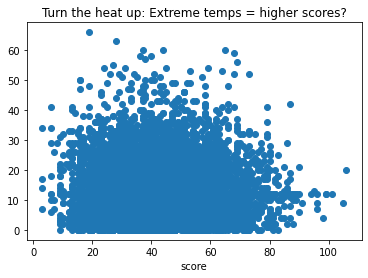

In [10]:
%matplotlib inline

scatter(scores_simp['total_score'], scores_simp['extreme_temps'])
xlabel ('score')
#ylabel ('score')
title ('Turn the heat up: Extreme temps = higher scores?');

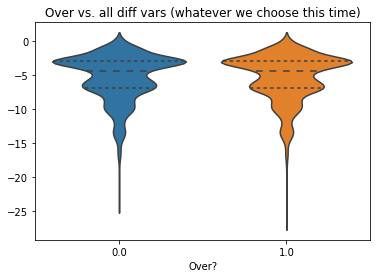

In [11]:
ax = sns.violinplot(x="over", y="spread_favorite",
                    data=scores_simp, inner="quart")
ax.set(xlabel="Over?",
       ylabel="",
       title="Over vs. all diff vars (whatever we choose this time)");

# RESULTS 

### YOU CAN'T BEAT THE CASINOS 

Ok, maybe you ~can~, but its hard. None of these variables alone differentiate between the over or under hitting 

### WHAT NEXT?

I think additional data would be insanely valuable to trying to predict the over/under. Specifically, I would like to see team ratings, defense and offense ratings specifically... both teams with high defense and low offence - bet the under?